## Smoothening Techniques
1. Moving Average
2. Simple Smoothening
3. Holt Method

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt
from pylab import rcParams
rcParams['figure.figsize'] = 20, 5

In [2]:
df = pd.read_csv('datasets/Electric_Production.csv')

In [4]:
df.head()

,DATE,IPG2211A2N
0,1/1/1985,72.5052
1,2/1/1985,70.6720
2,3/1/1985,62.4502
3,4/1/1985,57.4714
4,5/1/1985,55.3151


In [5]:
df.rename(columns={'IPG2211A2N': 'Units'}, inplace=True)

In [6]:
df.head()

,DATE,Units
0,1/1/1985,72.5052
1,2/1/1985,70.6720
2,3/1/1985,62.4502
3,4/1/1985,57.4714
4,5/1/1985,55.3151


### Moving Average Method

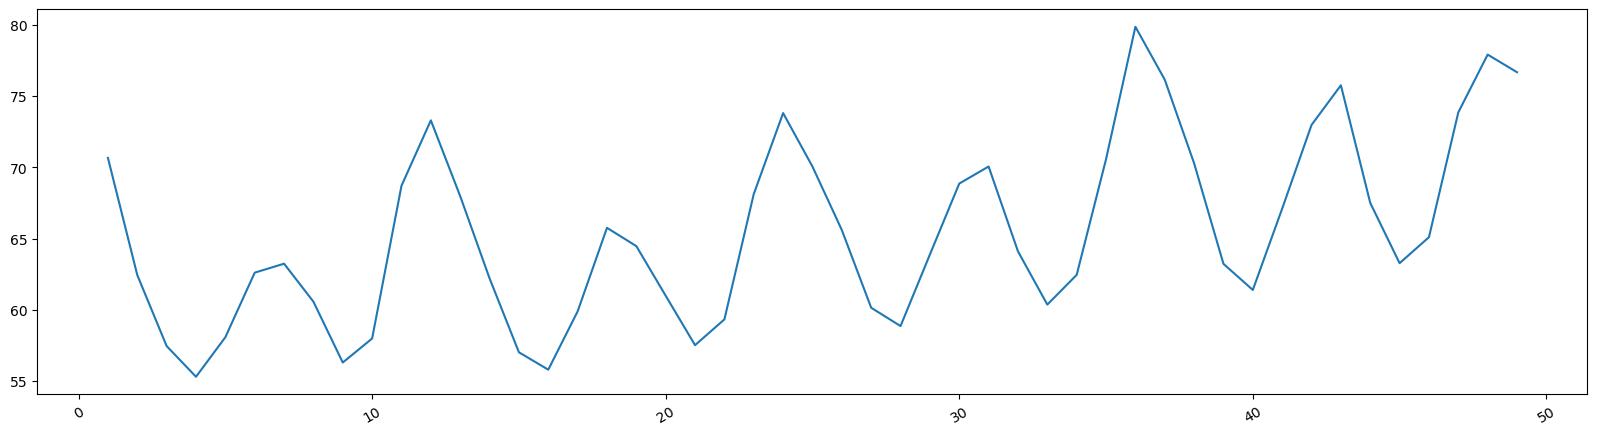

In [8]:
plt.plot(df[1:50]['Units'])
plt.xticks(rotation=30)
plt.show()

In [16]:
# rolling Average Transform
rollingseries = df[1:50].rolling(window=10)

In [17]:
rollingMean = rollingseries.mean(numeric_only=True) 
# finding rolling mean MA(5)

print(rollingMean.head(10))

       Units
1        NaN
2        NaN
3        NaN
4        NaN
5        NaN
6        NaN
7        NaN
8        NaN
9        NaN
10  60.47683


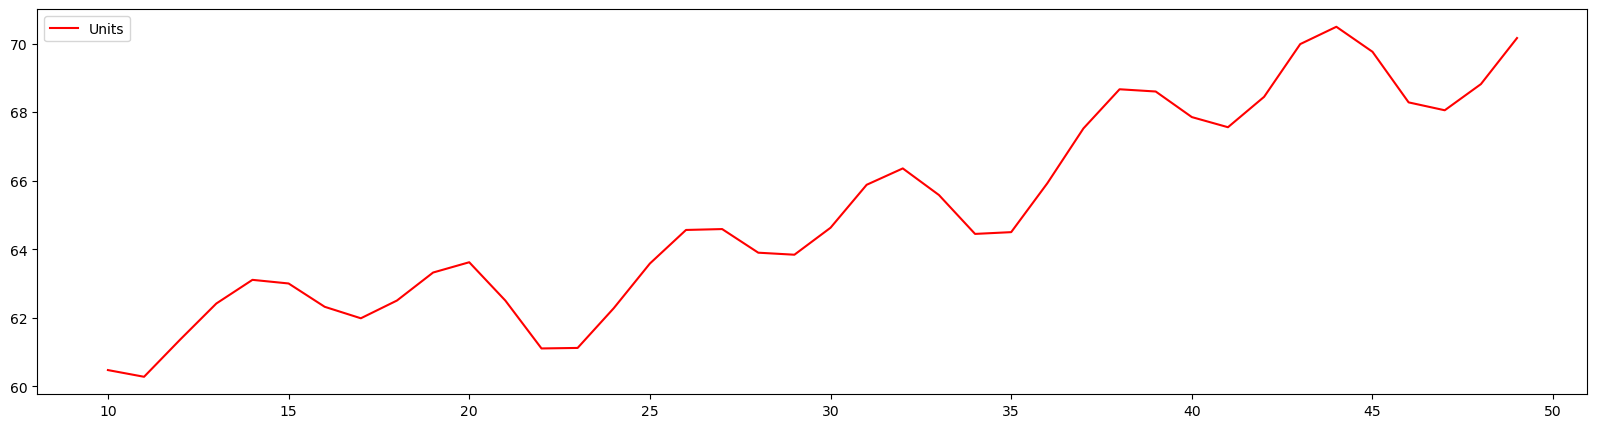

In [18]:
# plot tranformed dataset
rollingMean.plot(color='red')
plt.show()

### Simple Exponential Smoothening


In [22]:
df.set_index('DATE', inplace=True)

In [24]:
data = df[1:50]

fit1 = SimpleExpSmoothing(data).fit(smoothing_level=0.2, optimized=False)

fit2 = SimpleExpSmoothing(data).fit(smoothing_level=0.8, optimized=False)


/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


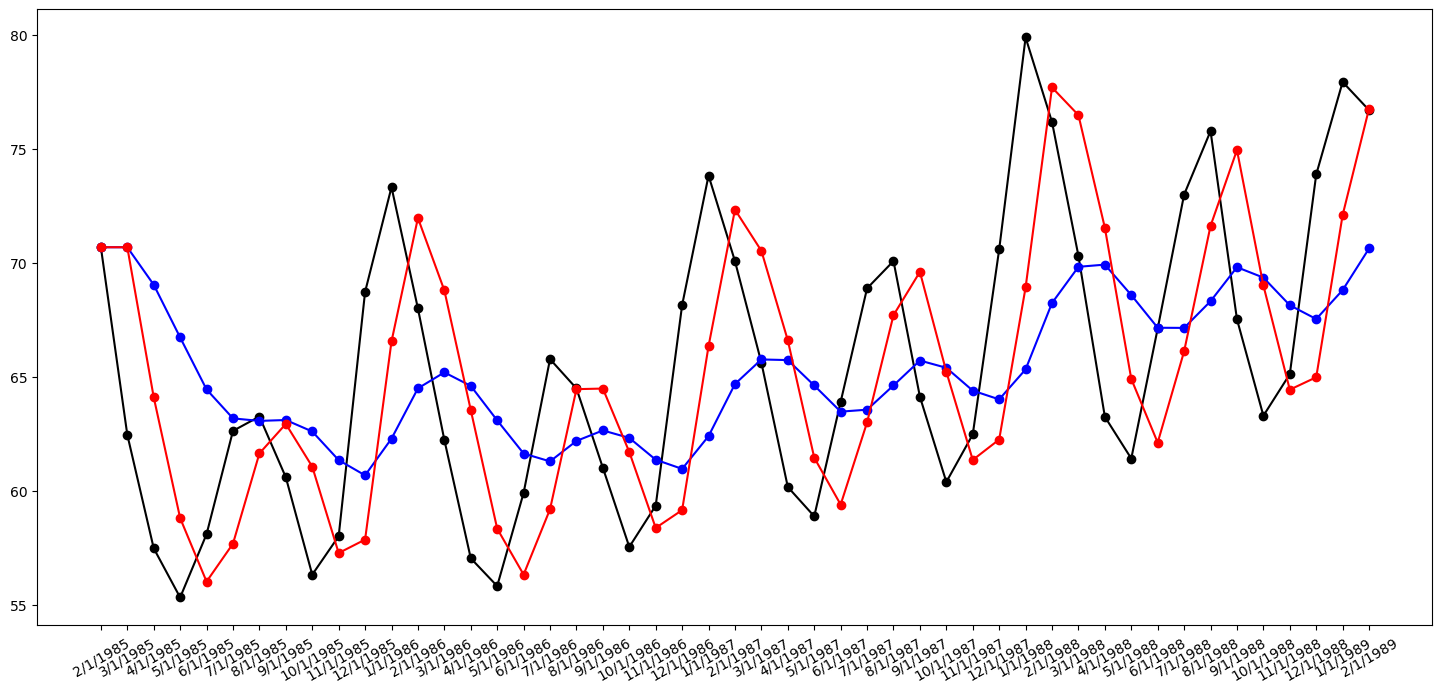

In [25]:
plt.figure(figsize=(18, 8))
plt.plot(df[1:50], marker='o', color='black')
plt.xticks(rotation=30)

plt.plot(fit1.fittedvalues, marker='o', color='blue')

plt.plot(fit2.fittedvalues, marker='o', color='red')


### Holt Method

In [26]:
fit1 = Holt(data).fit() # Linear Trend 

fit2 = Holt(data, exponential=True).fit() # Exponential Trend

/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


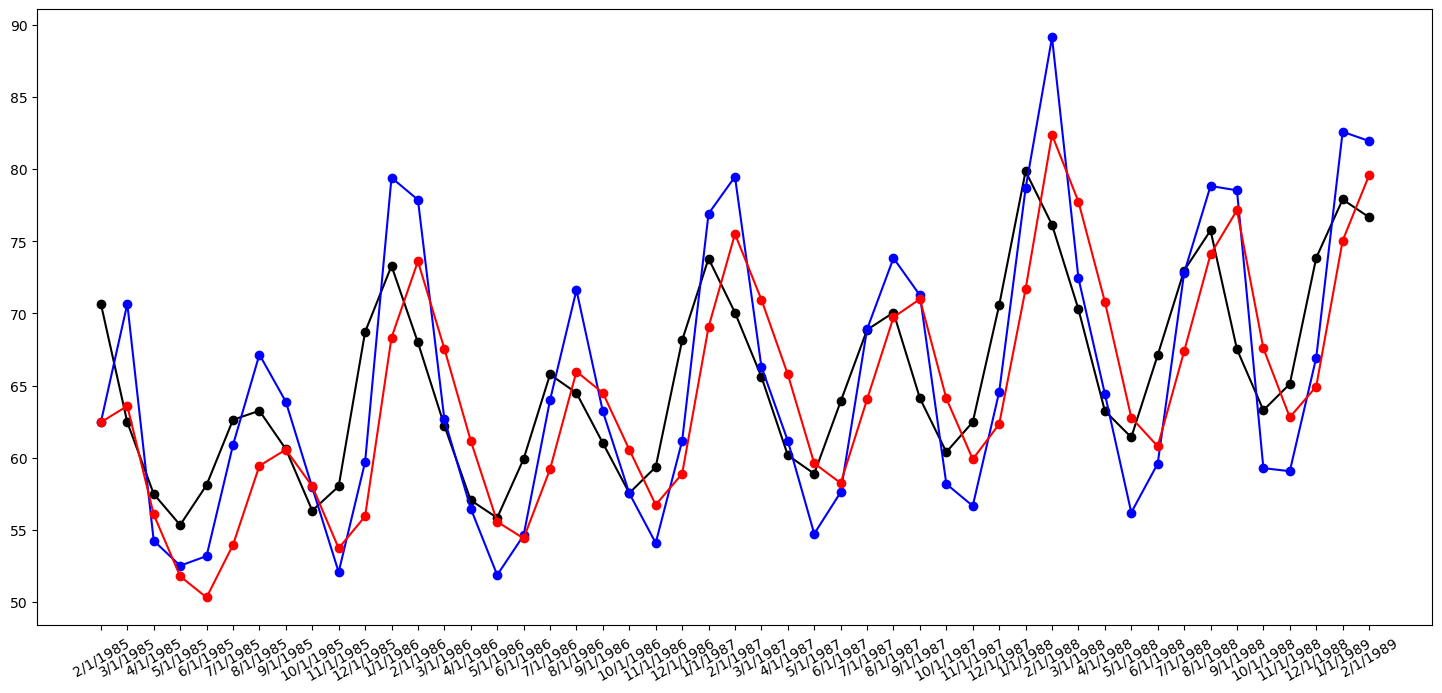

In [27]:
plt.figure(figsize=(18, 8))
plt.plot(df[1:50], marker='o', color='black')
plt.xticks(rotation=30)

plt.plot(fit1.fittedvalues, marker='o', color='blue')

plt.plot(fit2.fittedvalues, marker='o', color='red')

## Time Series - Decomposition and Stationarity

In [28]:
from statsmodels.tsa.seasonal import seasonal_decompose
from dateutil.parser import parse 

### 1. Definition of Addictive time series:
Value = Base Level + Trend + Seasonality + Error

### 2. Definition of Multiplicative time series

Value = Base Level * Trend * Seasonality * Error

In [12]:
df = pd.read_csv('datasets/TimeSeries.csv', parse_dates=['Date'], index_col='Date')

In [13]:
df.head(10)

,Value
Date,
1991-01-07,3.526591
1991-01-08,3.180891
1991-01-09,3.252221
1991-01-10,3.611003
1991-01-11,3.565869
1991-01-12,4.306371
1992-01-01,5.088335
1992-01-02,2.814520
1992-01-03,2.985811


In [14]:
df.to_csv('timeseries.csv')

In [32]:
df.reset_index(inplace=True)

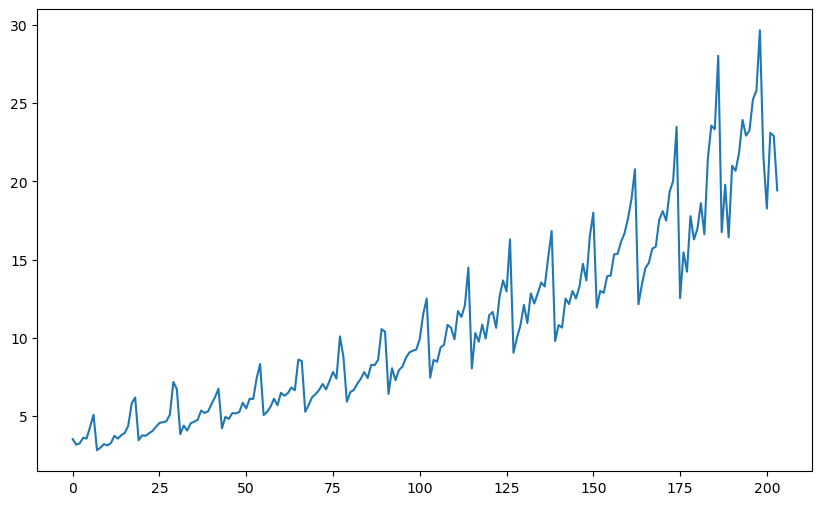

In [33]:
plt.rcParams.update({'figure.figsize': (10, 6)})
plt.plot(df['Value'])

In [34]:
# Multiplicative Decomposition
mul_result = seasonal_decompose(df['Value'],model='multiplicative', period=1)

# Addictive Decomposition
add_result = seasonal_decompose(df['Value'], model='addictive', period=1)

Text(0.5, 0.98, '\nMultiplicative Decompose')

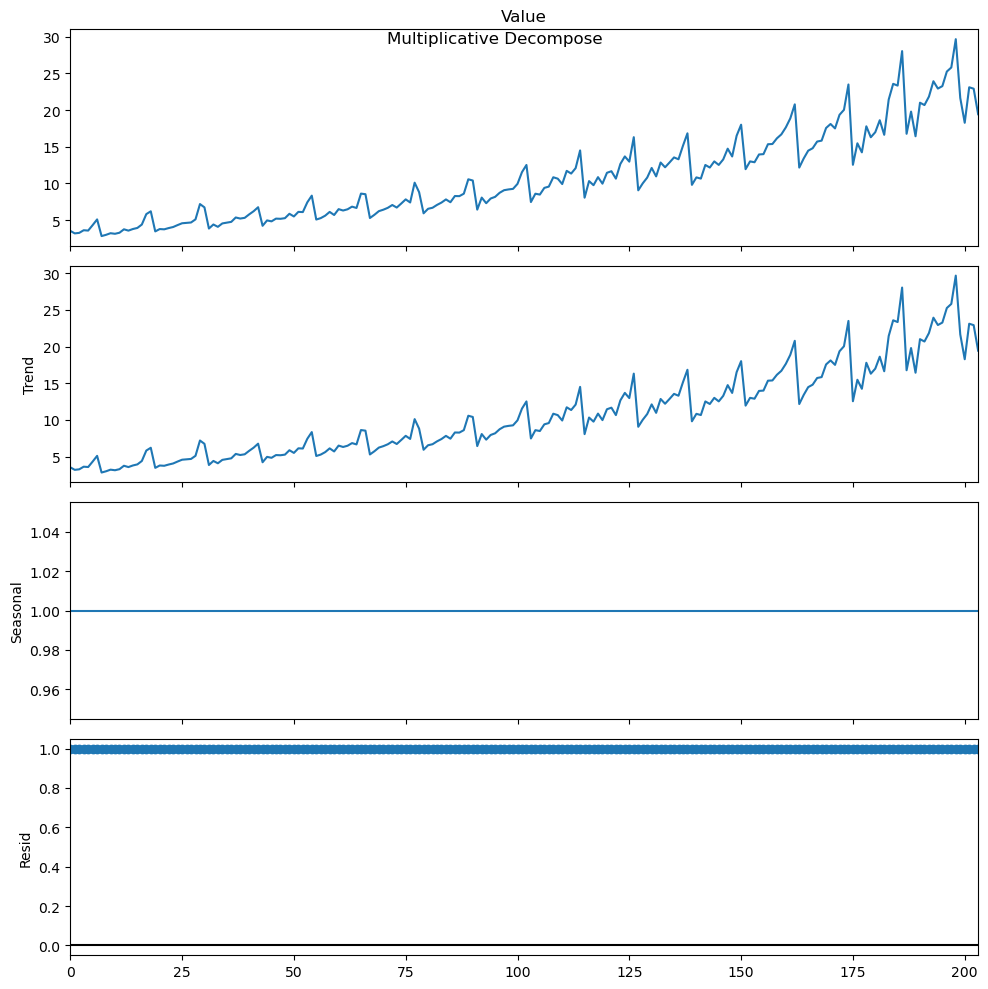

In [35]:
# Plot 
plt.rcParams.update({'figure.figsize': (10, 10)})
mul_result.plot().suptitle('\nMultiplicative Decompose', fontsize=12)

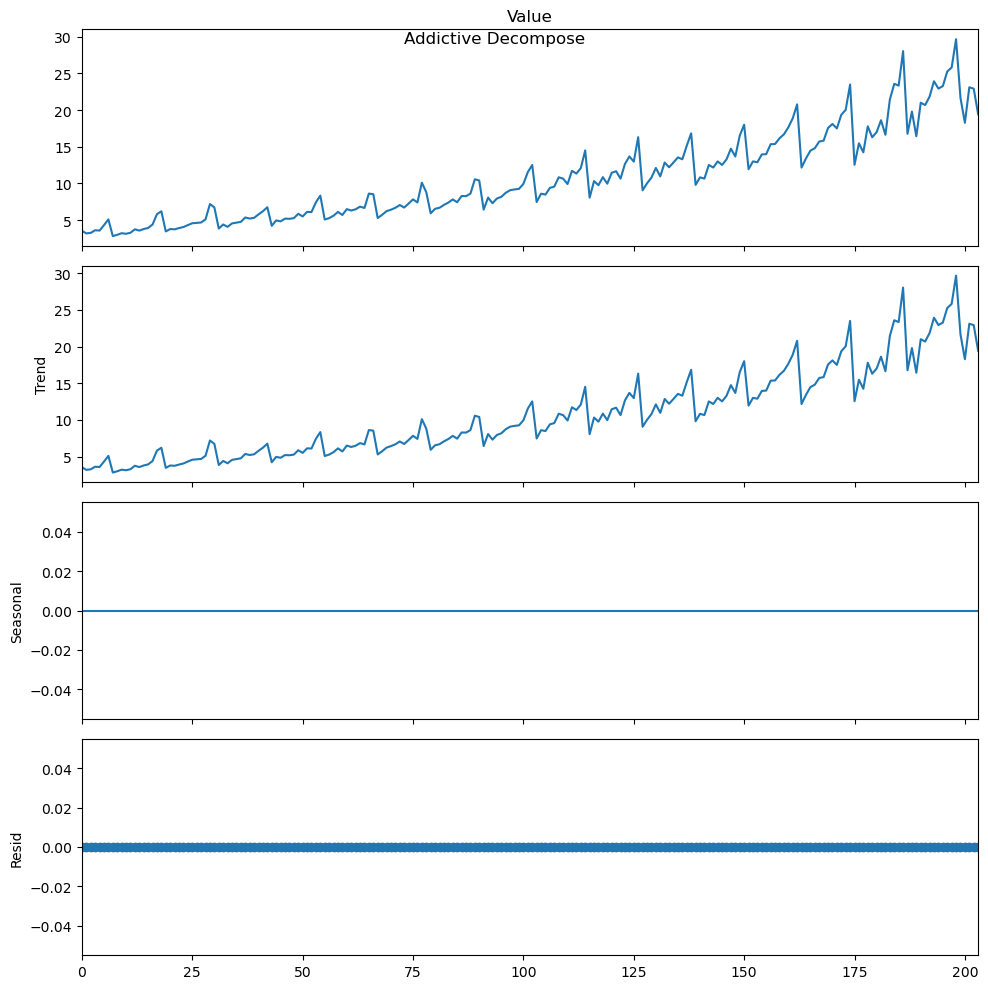

In [36]:
add_result.plot().suptitle('\nAddictive Decompose', fontsize=12)
plt.show()

In [38]:
# Addictive 
new_df_add = pd.concat([add_result.seasonal, add_result.trend, add_result.resid, add_result.observed], axis=1)
new_df_add.columns = ['seasonality', 'trend', 'residual', 'actual values']
new_df_add.head()

,seasonality,trend,residual,actual values
0,0.0,3.526591,0.0,3.526591
1,0.0,3.180891,0.0,3.180891
2,0.0,3.252221,0.0,3.252221
3,0.0,3.611003,0.0,3.611003
4,0.0,3.565869,0.0,3.565869


In [ ]:
# Multiplicative 
new_df_mul = pd.concat([mul_result.seasonal, mul_result.trend, mul_result.resid, mul_result.observed], axis=1)
new_df_mul.columns = ['seasonality', 'trend', 'residual', 'actual values']
new_df_mul.head()

,seasonality,trend,residual,actual values
0,1.0,3.526591,1.0,3.526591
1,1.0,3.180891,1.0,3.180891
2,1.0,3.252221,1.0,3.252221
3,1.0,3.611003,1.0,3.611003
4,1.0,3.565869,1.0,3.565869


### Augmented Dickey Fuller Test

In [ ]:
from statsmodels.tsa.stattools import adfuller

# ADF test - null hypothesis - non stationary - if p-value < 5% reject null hypothesis
adfuller_result = adfuller(df.Value.values, autolag='AIC')

print(f'ADF Statistics: {adfuller_result[0]}')
print(f'p - value: {adfuller_result[1]}')

for key, value in adfuller_result[4].items():
    print('Critical Values: ')
    print(f' {key}, {value}')

ADF Statistics: 3.1451856893067487
p - value: 1.0
Critical Values: 
 1%, -3.465620397124192
Critical Values: 
 5%, -2.8770397560752436
Critical Values: 
 10%, -2.5750324547306476


### Auto Regression with ACF and PACF

1. Lagged Series
2. Auto Regression 
3. ACF and PACF

#### Time series lagged example

Original timeseries = {21, 22, 21, 20, 19}

Lagged time siries by 1 lag = {Nan, 22, 21, 20, 19}

Lag 1 correlation means correlation between Orginal Time Series and Lagged by 1 Time Series.

In [41]:
import seaborn as sns 
sns.set(style='whitegrid', color_codes=True)
from statsmodels.tsa.stattools import acf, pacf

In [2]:
import numpy as np

axisline = np.linspace(0, 10, 500)

# Normal Distribution Values
normalnumbers = np.random.normal(0, 5, 500)

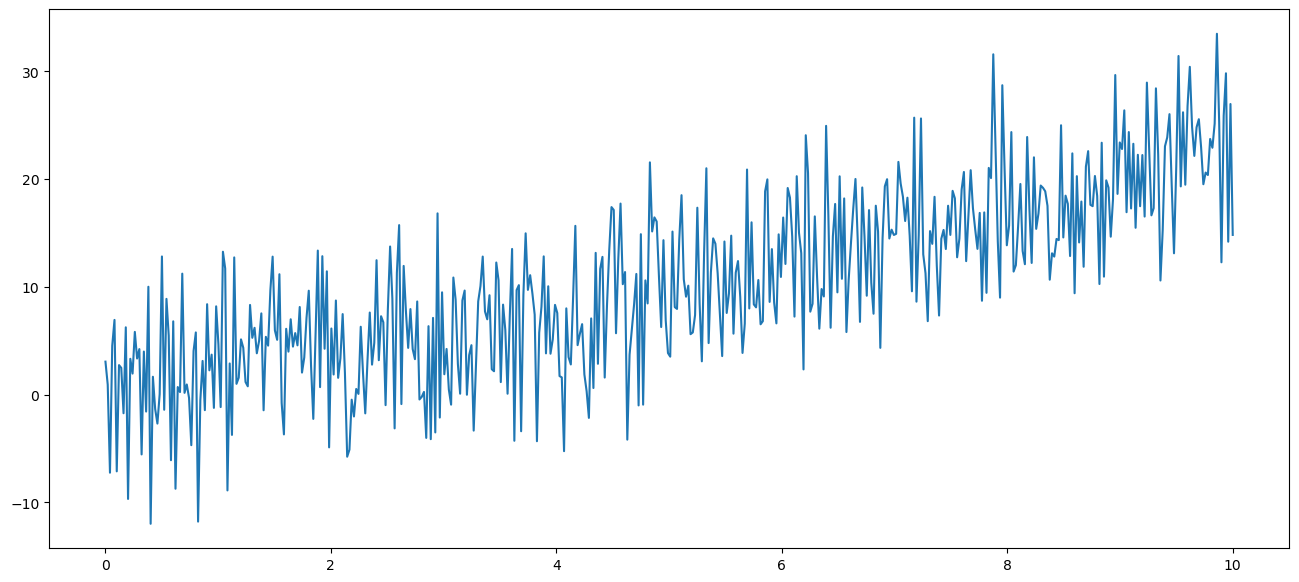

In [5]:
import matplotlib.pyplot as plt

# Exponential series to get the trend
ExponentialData = np.exp(axisline**0.5)

# adding normally distributed series in exponential series
y = normalnumbers+ExponentialData

# plot 
plt.figure(figsize=(16, 7))
plt.plot(axisline, y)

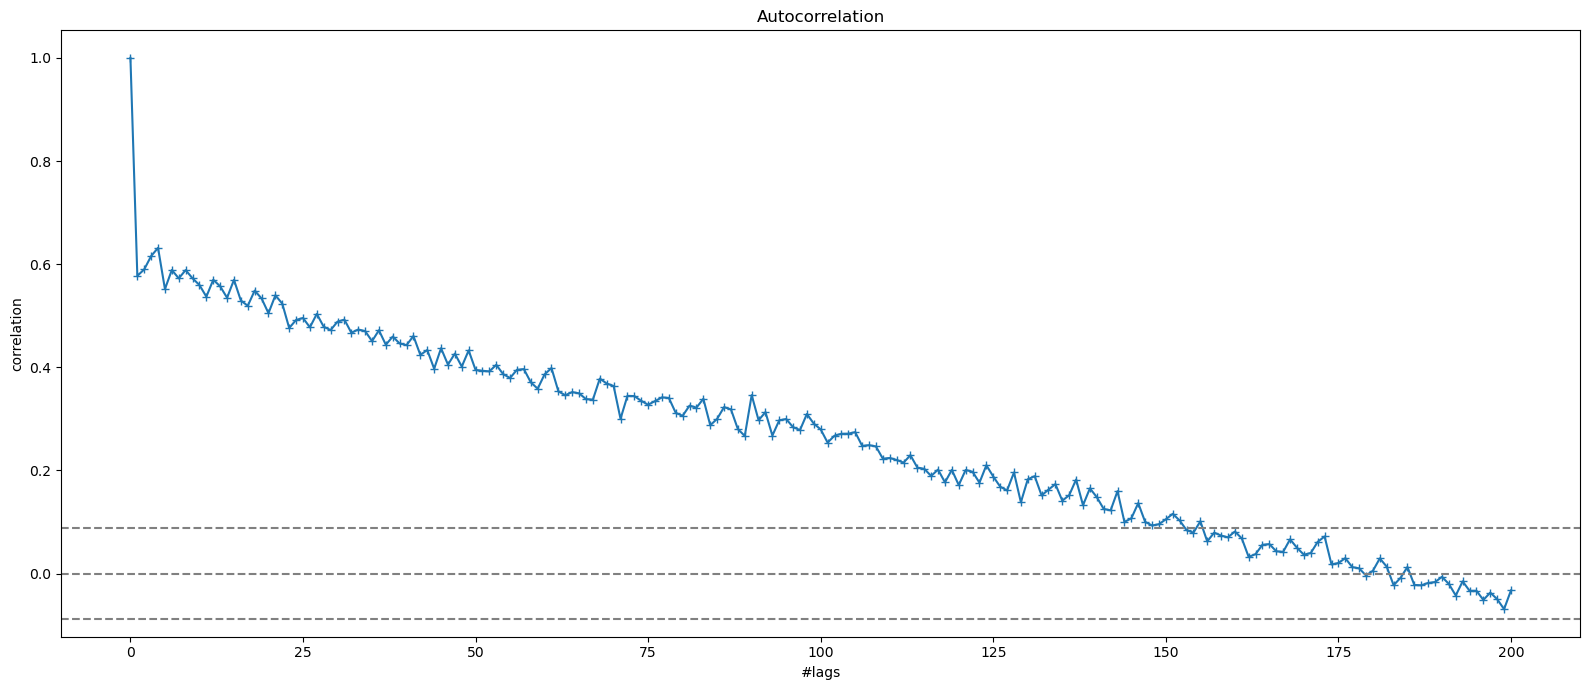

In [7]:
from statsmodels.tsa.stattools import acf, pacf
#calling auto correlation function
ACF_lag= acf(y, nlags=200)



#Plot PACF:
plt.figure(figsize=(16, 7))
plt.plot(ACF_lag,marker='+')
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(y)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(y)),linestyle='--',color='gray')
plt.title('Autocorrelation')
plt.xlabel('#lags')
plt.ylabel('correlation')
plt.tight_layout()

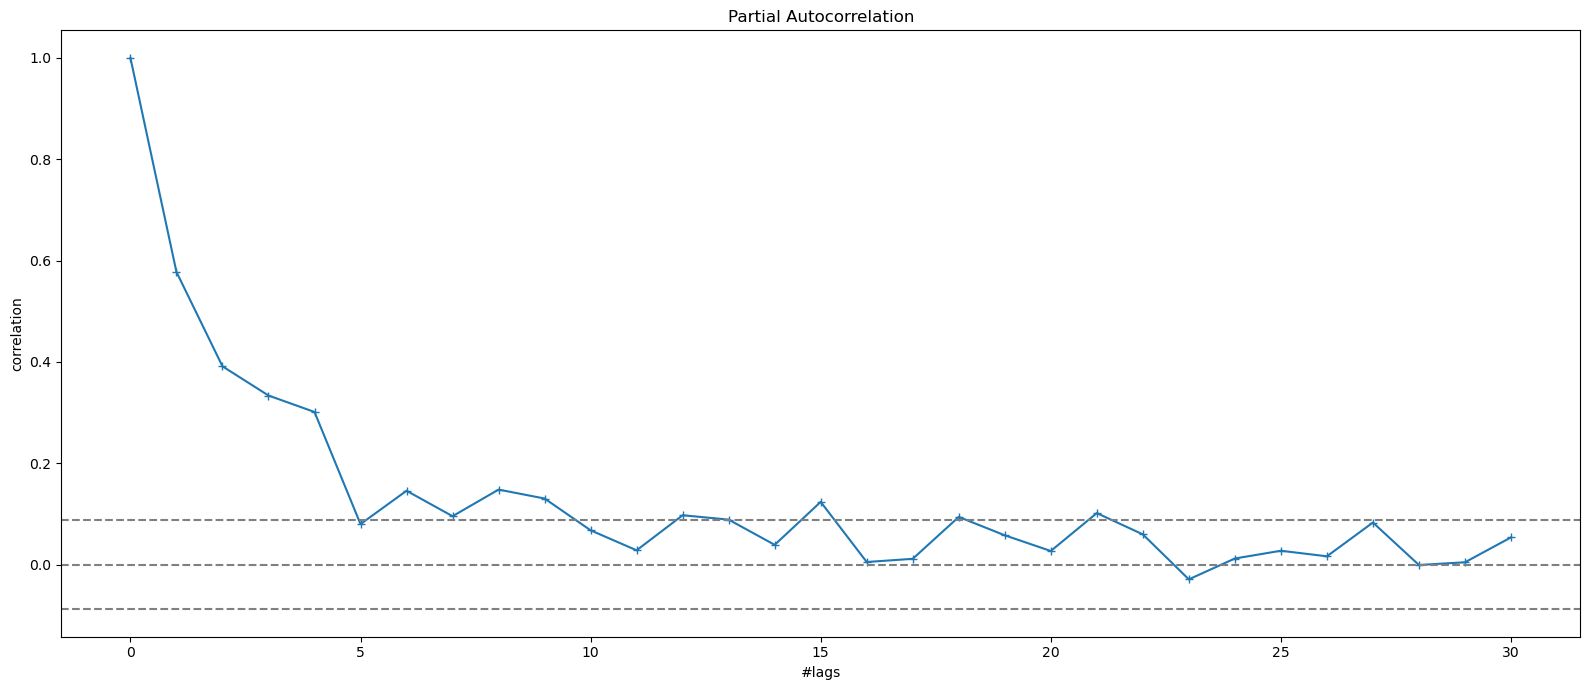

In [8]:
#calling partial correlation function
PACF_lag = pacf(y, nlags=30, method='ols')

#Plot PACF:
plt.figure(figsize=(16, 7))
plt.plot(PACF_lag,marker='+')
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(y)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(y)),linestyle='--',color='gray')
plt.title('Partial Autocorrelation')
plt.xlabel('#lags')
plt.ylabel('correlation')
plt.tight_layout()

In [ ]:
#